In [53]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN

In [51]:
df = pd.read_csv('wholesale.csv')

X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
print(df.info)
df.head()

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Density-Base clustering

target  dbscan_cluster
1       -1                298
2       -1                142
Name: dbscan_cluster, dtype: int64


<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

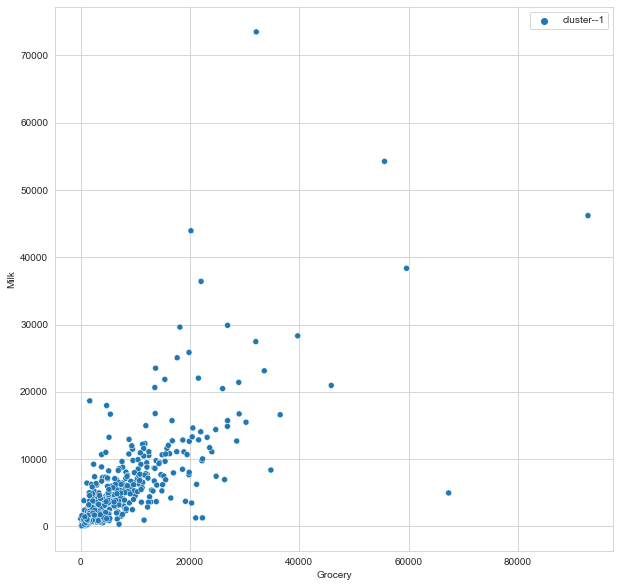

In [60]:
# Removing "Channel" and "Region" columns from dataframe
df_DBS = df.iloc[ : , 1:8]

# DBSCAN clustering
# eps : the furthest distance at which a point will pick its neighbours.
# I.e. this will decide how many neighbours a point will discover.
dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(df_DBS)

df_DBS['dbscan_cluster'] = dbscan_labels
df_DBS['target'] = df.Channel
df_result = df_DBS.groupby(['target'])['dbscan_cluster'].value_counts()

print(df_result)

# Result: 
# DBSCAN clustering is evaluated against the target groups
# 2 clusters were identified, denoted by 0 and 1
# 1 means noisy data (outliers)

# Visualizing DBSCAN clusters
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x="Grocery", y="Milk", data=df_DBS, hue=['cluster-{}'.format(x) for x in dbscan_labels])